#### Current notebook contains process of building linear and polynomial regression for forecasting value of Boston houses. "Boston house prices" dataset from sklearn library will be used for this task.

#### Import of required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

C:\Users\Nikita\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Loading of dataset

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
print(boston.DESCR)
df.head(10)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


#### Visual analysis
MEDV is target variable for the current task, another variables are regressors. Distributions of target variable in terms of regressors are presented below.    

***Notes:***
1. There is linear relationship between MEDV and LSTAT, also between MEDV and RM.
2. There is nonlinear relationship (similar to 1/x) between target variable and the following: CRIM, RAD, TAX, PTRATIO.
3. There is nonlinear relationship (similar to 1/x^0.5) between target variable and the following: DIS, INDUS, NOX.

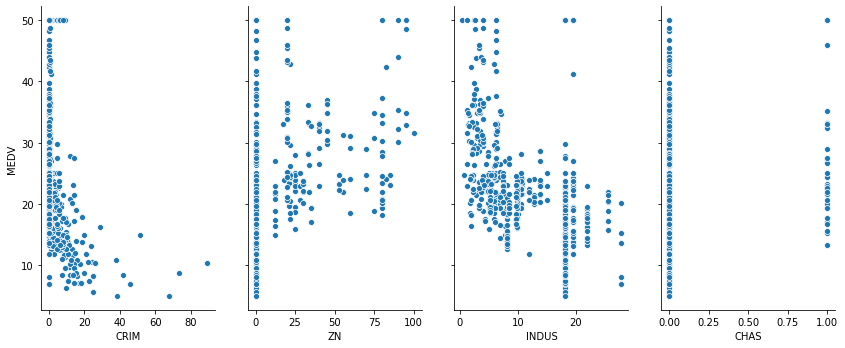

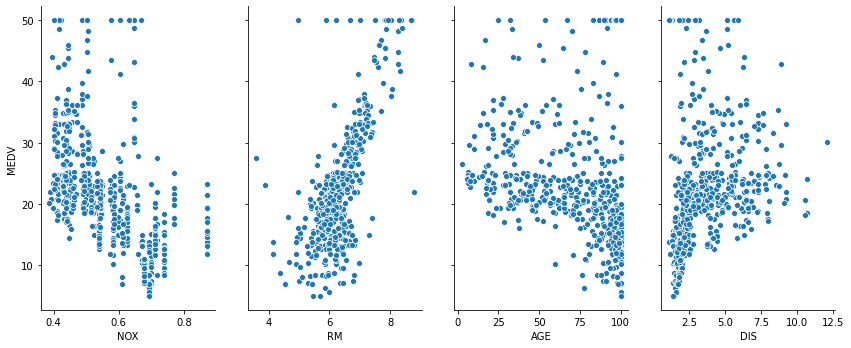

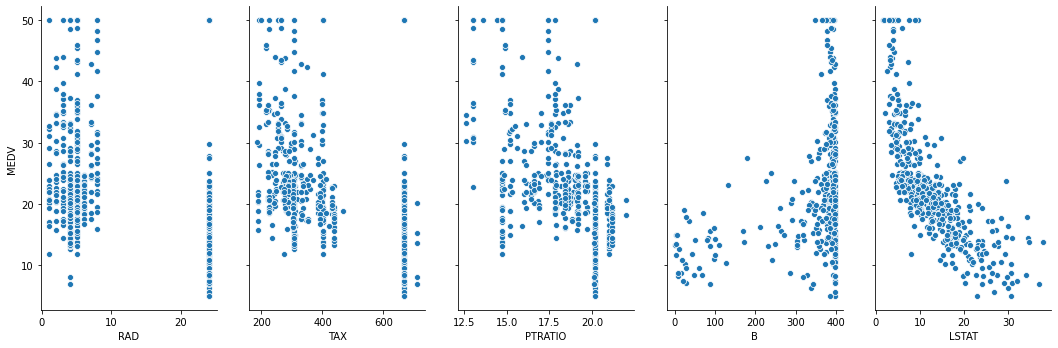

In [3]:
sns.pairplot(df,x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS'], y_vars=['MEDV'], height=5, aspect=0.6)
sns.pairplot(df,x_vars=['NOX', 'RM', 'AGE', 'DIS'], y_vars=['MEDV'], height=5, aspect=0.6)
sns.pairplot(df,x_vars=['RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['MEDV'], height=5, aspect=0.6)

#### Building of correlation matrix
Correlation matrix confirms linear relationship between MEDV and LSTAT/RM.

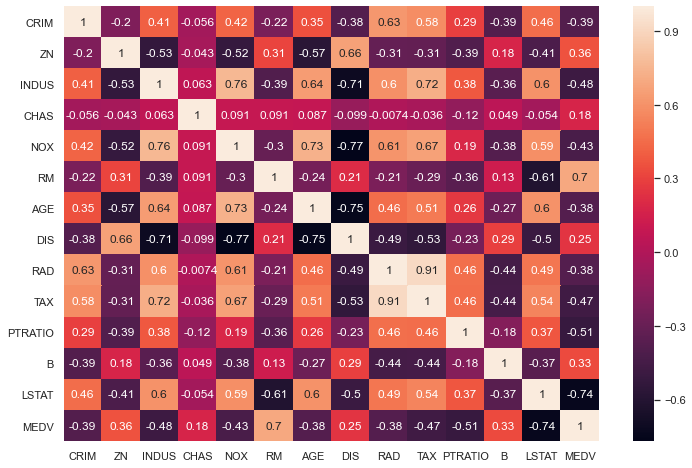

In [4]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(df.corr(),cbar=True,annot=True)

#### Splitting dataset for train and test subdatasets

In [5]:
target = df[['MEDV']]
df.drop(columns=['MEDV'], inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

### Creating a linear regression model

Selection of regressors for linear regression model is based on values of correlation matrix. LSTAT and RM have a high value of correlation with target variable.

In [6]:
# checking, if any column contains null values
print(df.isnull().values.any())

lr = LinearRegression()
lr.fit(x_train[['LSTAT', 'RM']], y_train)

# parameters of model
print(lr.intercept_[0])
print(lr.coef_[0])

False
-2.9687355711333474
[-0.66494813  5.39607121]


***Creating graphs, which represent, how model works on the train data: comparison between MEDV and predicted values in terms of regressors.***

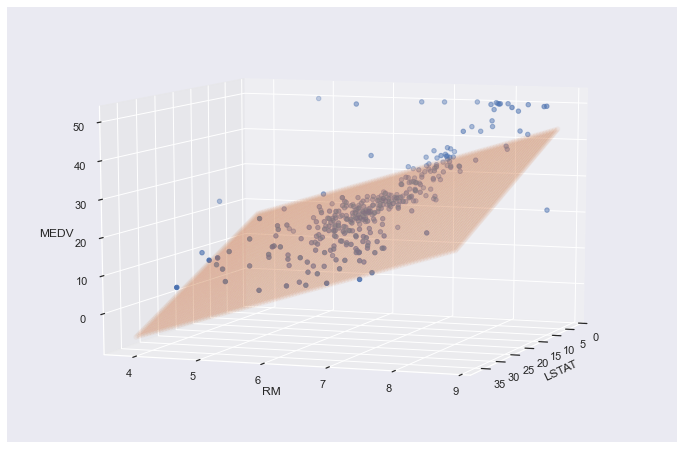

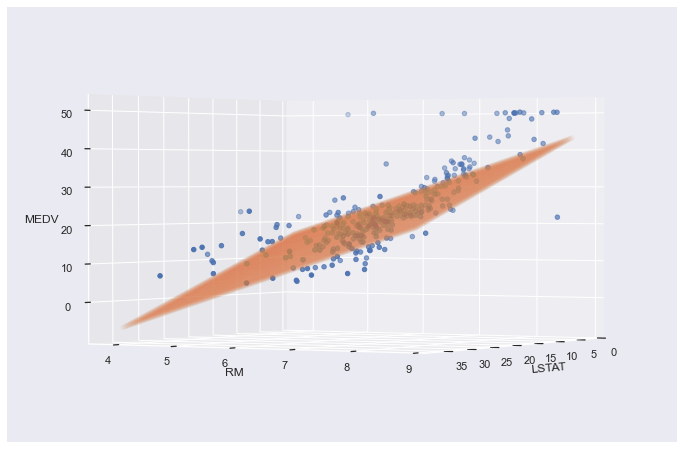

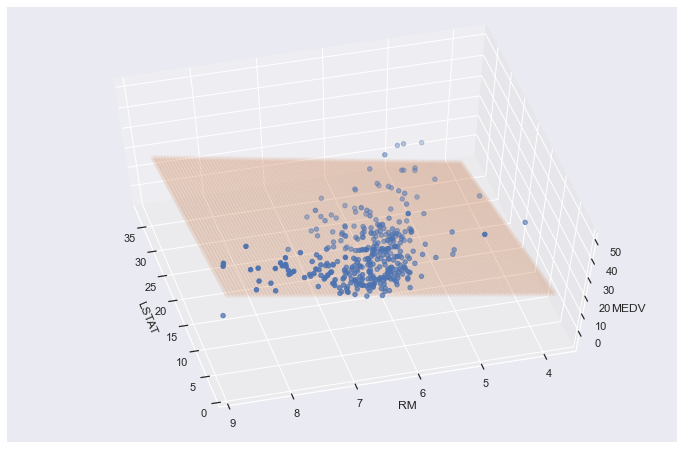

In [7]:
# for representing training data
x_plot = x_train.LSTAT.values
y_plot = x_train.RM.values
z_plot = y_train.values

# for representing predicted values
x_pred = np.linspace(x_plot.min(), x_plot.max(), num=100)
y_pred = np.linspace(y_plot.min(), y_plot.max(), num=100)
x_pred, y_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([x_pred.flatten(), y_pred.flatten()]).T
predicted = lr.predict(model_viz)


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
ax.scatter(x_plot, y_plot, z_plot)
ax.scatter(x_pred, y_pred, predicted, alpha=0.05)
ax.view_init(elev=10, azim=20)


fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('RM')
ax1.set_zlabel('MEDV')
ax1.scatter(x_plot, y_plot, z_plot)
ax1.scatter(x_pred, y_pred, predicted, alpha=0.05)
ax1.view_init(elev=1, azim=30)


fig = plt.figure()
ax2 = fig.add_subplot(111, projection = '3d')
ax2.set_xlabel('LSTAT')
ax2.set_ylabel('RM')
ax2.set_zlabel('MEDV')
ax2.scatter(x_plot, y_plot, z_plot)
ax2.scatter(x_pred, y_pred, predicted, alpha=0.05)
ax2.view_init(elev=60, azim=165)


plt.show()

***Testing, how model works on the test data:***    
Model  pretty well predicts values of target variable, сoefficient of determination has a good value.

MSE train: 30.74; MSE test: 30.36
R^2 train: 0.66; R^2 test: 0.57


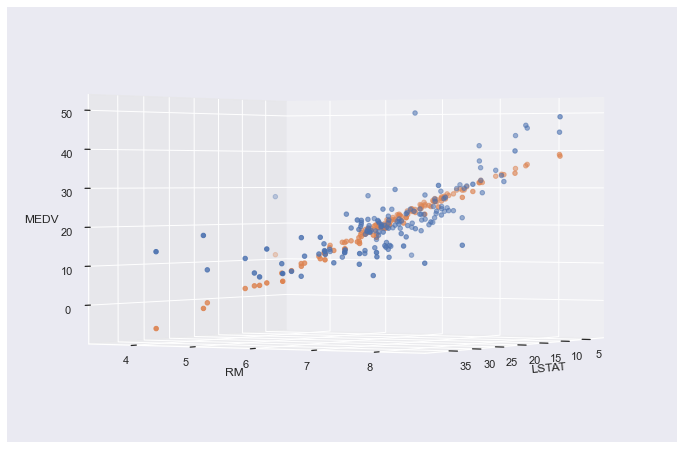

In [8]:
test_predictions = lr.predict(x_test[['LSTAT', 'RM']])
train_predictions = lr.predict(x_train[['LSTAT', 'RM']])

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('RM')
ax1.set_zlabel('MEDV')
ax1.scatter(x_test.LSTAT, x_test.RM, y_test.MEDV)
ax1.scatter(x_test.LSTAT, x_test.RM, test_predictions)
ax1.view_init(elev=1, azim=30)

print('MSE train: {:.2f}; MSE test: {:.2f}'.format(
        mean_squared_error(y_train, train_predictions),
        mean_squared_error(y_test, test_predictions)))
print('R^2 train: {:.2f}; R^2 test: {:.2f}'.format(
        r2_score(y_train, train_predictions),
        r2_score(y_test, test_predictions)))

### Creating a polynomial regression model
The following variables are added into polynomial model:
1. CRIM as 1/x
2. DIS as x^(1/2)
3. INDUS as 1/x^(1/2)
4. NOX as 1/x^(1/2)
5. RAD as 1/x
6. TAX as 1/x
7. PTRATIO as 1/x
8. LSTAT as x
9. RM as x

Modifying initial dataset for setting regressors.

In [9]:
x_train_poly = x_train.copy()

x_train_poly['CRIM'] = x_train_poly['CRIM'].apply(lambda x: 1 / x)
x_train_poly['DIS'] = x_train_poly['DIS'].apply(lambda x: x ** 0.5)
x_train_poly['INDUS'] = x_train_poly['INDUS'].apply(lambda x: 1 / (x ** 0.5))
x_train_poly['NOX'] = x_train_poly['NOX'].apply(lambda x: 1 / (x ** 0.5))
x_train_poly['RAD'] = x_train_poly['RAD'].apply(lambda x: 1 / x)
x_train_poly['TAX'] = x_train_poly['TAX'].apply(lambda x: 1 / x)
x_train_poly['PTRATIO'] = x_train_poly['PTRATIO'].apply(lambda x: 1 / x)

Fitting a model:

In [10]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_poly[['LSTAT', 'RM', 'CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']], y_train)

# parameters of model
print(poly_regr.intercept_[0])
print(poly_regr.coef_[0])

-22.318051839675995
[-6.19911780e-01  4.16828121e+00 -6.18545606e-03  5.60391880e+00
  1.55141223e+01 -6.58178065e+00 -3.91856340e+00  9.43519284e+02
  2.54052681e+02]


***Testing, how polynomial model works on the test data:***   
Model has a good value of R^2 on the train data, but it slightly below on the test data, same for MSE.

In [11]:
x_test_poly = x_test.copy()

x_test_poly['CRIM'] = x_test_poly['CRIM'].apply(lambda x: 1 / x)
x_test_poly['DIS'] = x_test_poly['DIS'].apply(lambda x: x ** 0.5)
x_test_poly['INDUS'] = x_test_poly['INDUS'].apply(lambda x: 1 / (x ** 0.5))
x_test_poly['NOX'] = x_test_poly['NOX'].apply(lambda x: 1 / (x ** 0.5))
x_test_poly['RAD'] = x_test_poly['RAD'].apply(lambda x: 1 / x)
x_test_poly['TAX'] = x_test_poly['TAX'].apply(lambda x: 1 / x)
x_test_poly['PTRATIO'] = x_test_poly['PTRATIO'].apply(lambda x: 1 / x)

test_predictions_poly = poly_regr.predict(x_test_poly[['LSTAT', 'RM', 'CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']])
train_predictions_poly = poly_regr.predict(x_train_poly[['LSTAT', 'RM', 'CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']])


print('MSE train: {:.2f}; MSE test: {:.2f}'.format(
        mean_squared_error(y_train, train_predictions_poly),
        mean_squared_error(y_test, test_predictions_poly)))
print('R^2 train: {:.2f}; R^2 test: {:.2f}'.format(
        r2_score(y_train, train_predictions_poly),
        r2_score(y_test, test_predictions_poly)))

MSE train: 22.95; MSE test: 21.88
R^2 train: 0.74; R^2 test: 0.69


### Conclusion

Polynomial model has a better value of R^2 and MSE on the train/test data, than linear model. So, polynomial model is better for prediction of target values, with the following coeffecients:

In [12]:
list(zip(x_train_poly[['LSTAT', 'RM', 'CRIM', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO']].columns, poly_regr.coef_[0]))

[('LSTAT', -0.619911779792357),
 ('RM', 4.168281211724676),
 ('CRIM', -0.0061854560645224765),
 ('INDUS', 5.60391880433557),
 ('NOX', 15.514122289643643),
 ('DIS', -6.581780650076102),
 ('RAD', -3.918563399258684),
 ('TAX', 943.5192841935869),
 ('PTRATIO', 254.0526807609971)]